In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [0]:
plt.rcParams["figure.figsize"] = (10,5)

In [14]:
#Reading store details
store = pd.read_csv('/content/sample_data/store.csv')
#Reading sales details for all stores
training = pd.read_csv('/content/sample_data/train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
training.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [19]:
#Merging two dataset based on store id
train = pd.merge(training, store, on='Store')
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [0]:
#Extracting categorical and numerical columns for reference
numeric_columns = ["Store","Sales","Customers","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek"]
categorical_columns = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2','Promo2SinceYear','PromoInterval']
string_columns = ['Date']

In [21]:
#Checking null count against all columns
train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

From the null count data Promo2SinceWeek,Promo2SinceYear,PromoInterval having half of the null values and CompetitionOpenSinceMonth, CompetitionOpenSinceYear are having one third of null values. So it is better for now to drop these columns before proceed with models.

In [0]:
#Filling missing values for CompetitionDistance with mean
train.loc[(train['CompetitionDistance'].isnull()), 'CompetitionDistance'] = train['CompetitionDistance'].mean()

***Exploratory data analysis and feature engineering***

**1. Check how much numerical columns are normally distributing**

1.598650289950892

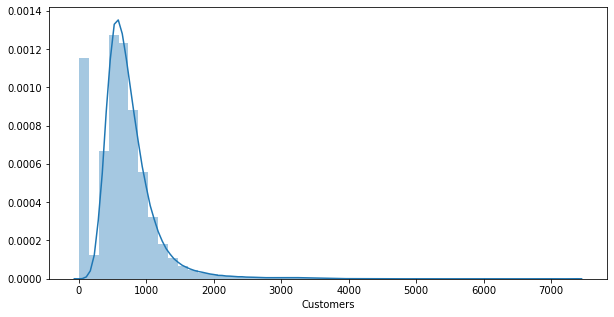

In [25]:
#Customers
sns.distplot(train['Customers'])
train['Customers'].skew()

2.9323445758426656

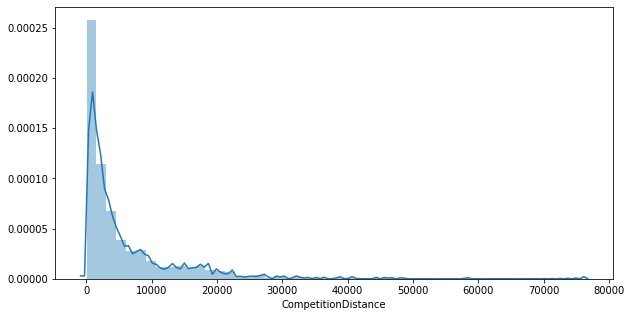

In [26]:
#CompetitionDistance
sns.distplot(train['CompetitionDistance'])
train['CompetitionDistance'].skew()

0.6414596158103798

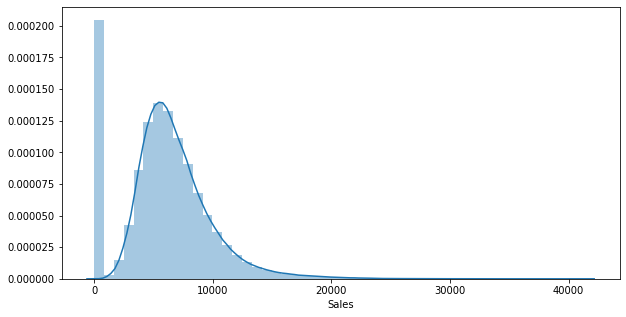

In [27]:
#Sales
sns.distplot(train['Sales'])
train['Sales'].skew()

So Customers, CompetitionDistance are having positive skew. Sales is having less skew. So we have to normalize it.

**Bivariate Analysis - Target vs Feature**


**Categorical vs Target**

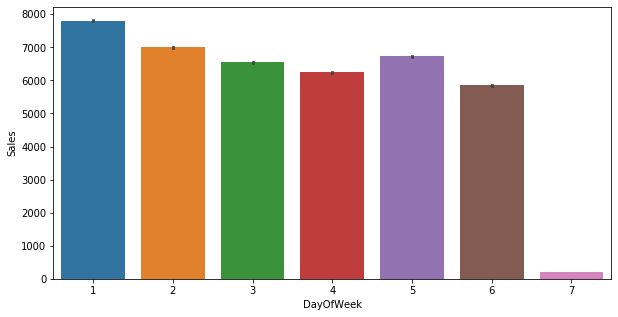

In [29]:
#Sales vs DayOfWeek
sns.barplot(x='DayOfWeek', y='Sales', data=train)

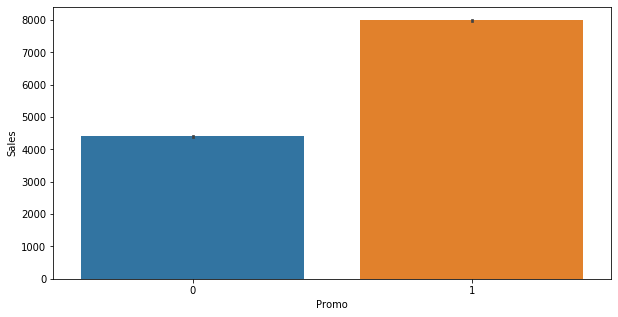

In [30]:
#Sales vs Promo
sns.barplot(x='Promo', y='Sales', data=train)

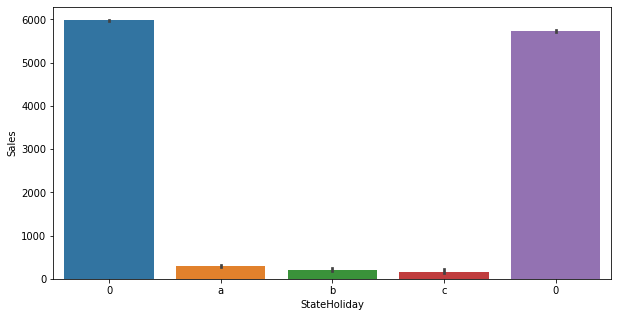

In [31]:
#Sales vs StateHoliday
sns.barplot(x='StateHoliday', y='Sales', data=train)

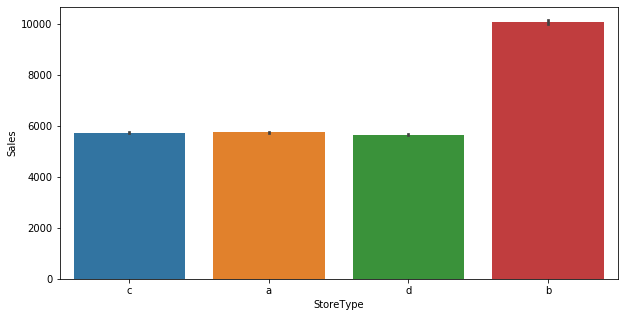

In [32]:
#Sales vs StoreType
sns.barplot(x='StoreType', y='Sales', data=train)

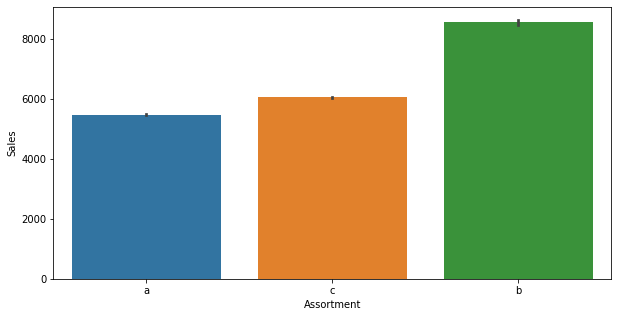

In [33]:
#Sales vs Assortment
sns.barplot(x='Assortment', y='Sales', data=train)

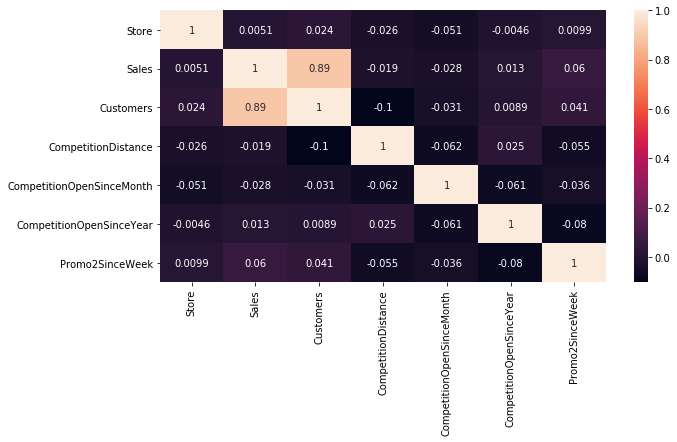

In [34]:
#Checking correlation between numerical columns
corr = train[numeric_columns].corr()
sns.heatmap(corr, annot=True)

From the data we can create new feature called **Promo2Now** based on Promo2 and Promo2Interval. Since that Promo2Interval are running once in 4 months, we can check with current month and predict promo2 is running in current month or not.


So we can keep categorical columns except promo2 details. So we can drop promo2 details after creating new feature Promo2Now

In [0]:
train['Date'] = pd.to_datetime(train['Date']   )

In [37]:
for i in train.index:
 if i%100000 == 0:
  print("iteration count is ",i)
 try:
   PromoMonths = [d.strip()[:3].lower() for d in train.loc[i, 'PromoInterval'].split(',')]
 except:
   PromoMonths = []
 train.loc[i, 'PromoNow'] = int(train.loc[i, 'Date'].strftime('%b').lower() in PromoMonths)
print("finished")

iteration count is  0
iteration count is  100000
iteration count is  200000
iteration count is  300000
iteration count is  400000
iteration count is  500000
iteration count is  600000
iteration count is  700000
iteration count is  800000
iteration count is  900000
iteration count is  1000000
finished


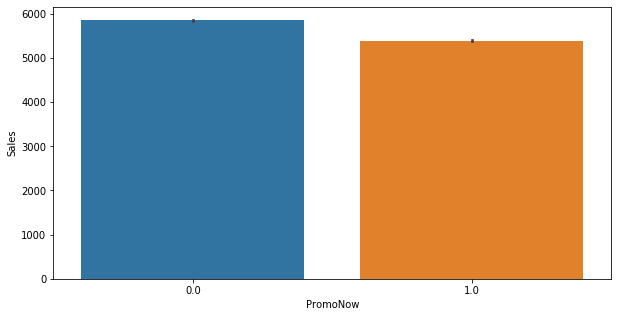

In [40]:
#PromoNow vs Assortment
sns.barplot(x='PromoNow', y='Sales', data=train)

**Data Normalization**

In [41]:
#Customers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['CustomersNorm'] = scaler.fit_transform(train[['Customers']])
train['CustomersNorm'].skew()

1.5986502899508914

In [42]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
train['CustomersNorm'] = stdscaler.fit_transform(train[['Customers']])
train['CustomersNorm'].skew()

1.5986502899508923

In [43]:
from sklearn.preprocessing import power_transform
train['CustomersNorm'] = power_transform(train[['Customers']], method='yeo-johnson')
train['CustomersNorm'].skew()

-0.5846679464607752

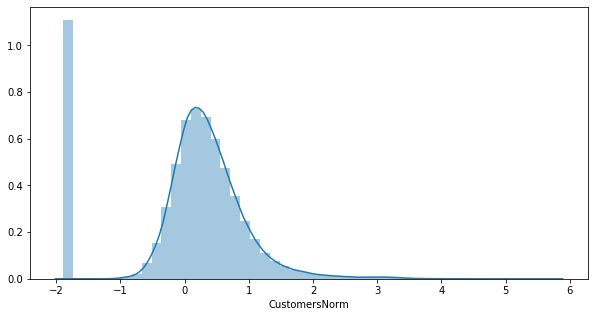

In [44]:
sns.distplot(train['CustomersNorm'])

Seems yeo johnson method gives the best result. So normalize Customers with yeo johnson.

In [45]:
train['Customers'] = power_transform(train[['Customers']], method='yeo-johnson')
train['Customers'].skew()

-0.5846679464607752

In [46]:
#CompetitionDistance
scaler = MinMaxScaler()
train['CompetitionDistanceNorm'] = scaler.fit_transform(train[['CompetitionDistance']])
train['CompetitionDistanceNorm'].skew()

2.9323445758426607

In [47]:
train['CompetitionDistanceNorm'] = power_transform(train[['CompetitionDistance']], method='yeo-johnson')
train['CompetitionDistanceNorm'].skew()

-0.03333339415097977

For CompetitionDistance also yeo johnson gives the best result

In [48]:
train['CompetitionDistance'] = power_transform(train[['CompetitionDistance']], method='yeo-johnson')
train['CompetitionDistance'].skew()

-0.03333339415097977

In [49]:
#Sales
train['Sales'].skew()

0.6414596158103798

In [50]:
scaler = MinMaxScaler()
train['SalesNorm'] = scaler.fit_transform(train[['Sales']])
train['SalesNorm'].skew()

0.6414596158103798

In [51]:
stdscaler = StandardScaler()
train['SalesNorm'] = stdscaler.fit_transform(train[['Sales']])
train['SalesNorm'].skew()

0.6414596158103799

Sales is ok by default, already it has less skew. So we can proceed with it

In [0]:
#Create new feature Month from Date
train['Month'] = train['Date'].dt.strftime('%m').astype(np.int32)

In [58]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoNow,CustomersNorm,CompetitionDistanceNorm,SalesNorm,Month
0,1,5,2015-07-31,5263,0.087673,1,1,0,1,c,a,-0.394322,9.0,2008.0,0,NaN,NaN,NaN,0.0,0.087673,-0.394322,-0.132683,7
1,1,4,2015-07-30,5020,0.070528,1,1,0,1,c,a,-0.394322,9.0,2008.0,0,NaN,NaN,NaN,0.0,0.070528,-0.394322,-0.195801,7
2,1,3,2015-07-29,4782,0.026075,1,1,0,1,c,a,-0.394322,9.0,2008.0,0,NaN,NaN,NaN,0.0,0.026075,-0.394322,-0.257620,7
3,1,2,2015-07-28,5011,0.097140,1,1,0,1,c,a,-0.394322,9.0,2008.0,0,NaN,NaN,NaN,0.0,0.097140,-0.394322,-0.198139,7
4,1,1,2015-07-27,6102,0.193250,1,1,0,1,c,a,-0.394322,9.0,2008.0,0,NaN,NaN,NaN,0.0,0.193250,-0.394322,0.085244,7


In [0]:
#Backup before drop
train_before_drop = train.copy()

In [0]:
#Drop unwanted columns
train.drop(columns=['Date', 'Store', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval','CompetitionDistanceNorm','CustomersNorm','SalesNorm'], inplace=True)

In [61]:
train.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,PromoNow,Month
0,5,5263,0.087673,1,1,0,1,c,a,-0.394322,0.0,7
1,4,5020,0.070528,1,1,0,1,c,a,-0.394322,0.0,7
2,3,4782,0.026075,1,1,0,1,c,a,-0.394322,0.0,7
3,2,5011,0.097140,1,1,0,1,c,a,-0.394322,0.0,7
4,1,6102,0.193250,1,1,0,1,c,a,-0.394322,0.0,7


Since we are having more than 10 lakh records, we need mor features. Try to convert categorical columns to one hot encoding as much as possible. Once the model is trained based on bias/variance we can again reduce features using label encoding

In [0]:
train = pd.get_dummies(train, columns=['StoreType', 'Assortment','DayOfWeek','Month'])

In [0]:
train = pd.get_dummies(train, columns=['StateHoliday'])

In [66]:
train.head()

,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,PromoNow,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,5263,0.087673,1,1,1,-0.394322,0.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,5020,0.070528,1,1,1,-0.394322,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4782,0.026075,1,1,1,-0.394322,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,5011,0.097140,1,1,1,-0.394322,0.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,6102,0.193250,1,1,1,-0.394322,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [0]:
#Backup of cleaned data before model
train_before_model = train.copy()

**Splitting whole data into training and testing**

In [0]:
target = train['Sales']
train.drop(columns=['Sales'], inplace=True)

In [70]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(712046, 37)
(305163, 37)


**Metrics to evaluate model**

In [0]:
#Root mean percentage square error - For Kaggle evaluation
def rmpse(y_actual, y_pred):
   return np.sqrt(np.mean(np.square((y_actual[y_actual != 0] - y_pred[y_actual != 0]) / y_actual[y_actual != 0])))

***1. Linear Regression***

In [84]:
#Training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
r2score = lr.score(X_train, y_train)
train_pred = lr.predict(X_train)
print("Training Score")
print('R2score:', r2score, 'RMPSE:',rmpse(y_train, train_pred))

Training Score
R2score: 0.9094804155454994 RMPSE: 0.22126025953919606


In [85]:
#Testing
r2score_test = lr.score(X_test, y_test)
test_pred = lr.predict(X_test)
print("Testing Score")
print('R2score:', r2score_test ,'RMPSE:',rmpse(y_test, test_pred))

Testing Score
R2score: 0.9100289311451973 RMPSE: 0.20463214815947367


Seems our model performs well for test data. Lets check prediction error plots using Yellowbrick

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


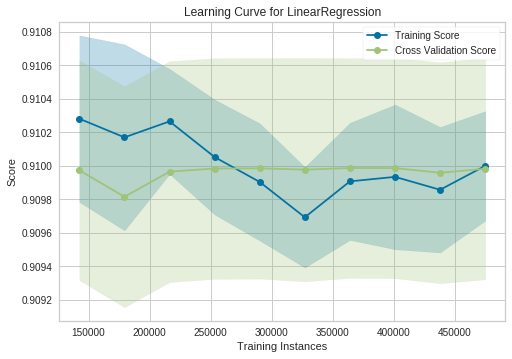

In [86]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
viz = LearningCurve(lr, train_sizes=sizes, scoring='r2')
viz.fit(X_train, y_train)
viz.poof()

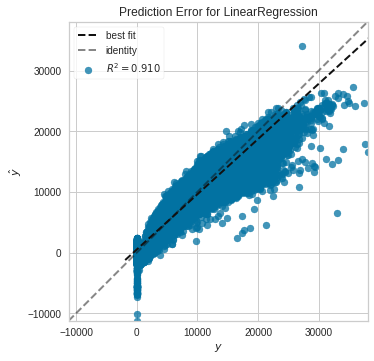

In [87]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lr)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

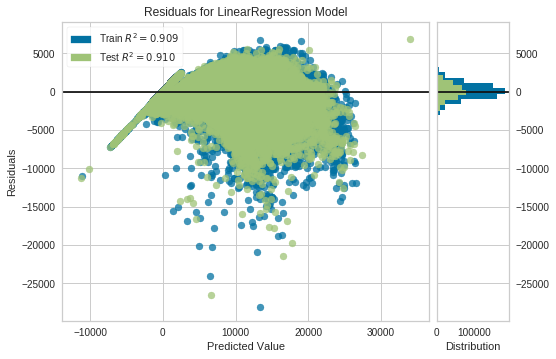

In [88]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

***2. Random Forest***

In [89]:
#Training
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
r2score = rf.score(X_train, y_train)
train_pred = rf.predict(X_train)
print('R2score:', r2score ,'RMPSE:',rmpse(y_train, train_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2score: 0.9956234543357896 RMPSE: 0.037483456310064424


In [90]:
#Testing
r2score_test = rf.score(X_test, y_test)
test_pred = rf.predict(X_test)
print('R2score:', r2score_test ,'RMPSE:',rmpse(y_test, test_pred))

R2score: 0.9760999471221395 RMPSE: 0.08682973960507075


Since training score is 99% and testing score is 97%, RandomForest works well. 
